In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [128]:
def real_f(x, y):
    return np.log(x) + 5

def f(x, y):
    return 1 / x

def euler(f, init, x_bound, h=0.1):
    x0, y0 = init
    X, Y = [x0], [y0]
    
    while X[-1] < x_bound:
        xn = X[-1]
        yn = Y[-1]
        
        xnext = xn + h
        ynext = yn + h*f(xn, yn)
        
        X.append(xnext)
        Y.append(ynext)         
                    
    return X, Y

In [112]:
# u = (y, y') = (y, z)
k = 5

def F(x, u):
    y, v = u
    
    return -k*y

def du(x, u):
    y, z = u
    
    return np.array([z, F(x, u)])

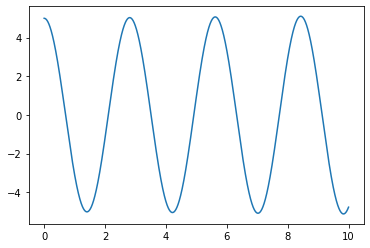

In [119]:
x0 = 0
u0 = np.array([5, 0])

x, u = euler(du, (x0, u0), 10, 0.001)
u = np.vstack(u)
y, z = u.T

plt.plot(x, y)

In [122]:
def runge_kutta(f, init, x_bound, h=0.1):
    x0, y0 = init
    X, Y = [x0], [y0]
    
    while X[-1] < x_bound:
        xn = X[-1]
        yn = Y[-1]
        
        k1 = f(xn, yn)
        k2 = f(xn + h/2, yn + (h/2)*k1)
        k3 = f(xn + h/2, yn + (h/2)*k2)
        k4 = f(xn + h, yn + h*k3)
        
        xnext = xn + h
        ynext = yn + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        X.append(xnext)
        Y.append(ynext)         
                    
    return X, Y

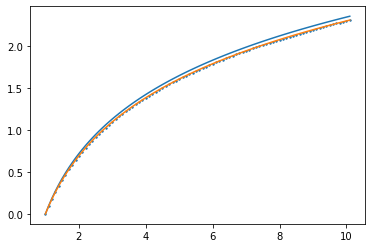

In [146]:
x0, y0 = 1, 0

x1, y1 = euler(f, (x0, y0), 10)
x2, y2 = runge_kutta(f, (x0, y0), 10)

plt.plot(x1, y1)
plt.plot(x2, y2)

y_real = np.log(x1)
plt.scatter(x1, y_real, s=2)

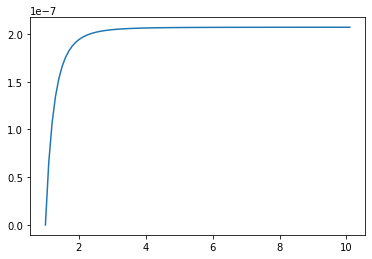

In [149]:
# plt.plot(x1, np.abs(y1 - y_real))
plt.plot(x1, np.abs(y2 - y_real))
# plt.yscale('log')